# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [139]:
def deriv(f, x, h):
    """ Compute a derivative of `f` at point `x` with step size `h`.
    
    Compute the derivative using the one-sided rule of the approximation order of $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x using the step size h.
    """
    # ... ENTER YOUR CODE HERE ...
    Df = (-1.5 * f(x) + 2 * f(x + h) - 0.5 * f(x + 2*h))/h    # для коэффициентов надо решить систему, чтобы занулить в разложении все члены до O(h**3), кроме самой производной
    
    return Df
print(np.log(3e-200))

-459.41840631014105


#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [122]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-107]:
    err = deriv(lambda x: x**3, x, h) - 0.0
    print("%5g -- %7.4g" % (h, err))

 0.01 -- -0.0002
0.001 --  -2e-06
0.0001 --  -2e-08
1e-107 -- -2.006e-214


Видно, что ошибка(истинное значение должно быть нулем) $\sim$ h**2

Однааако, если мы слишком перетрудимся с уменьшением шага, у нас начнет все ломаться из-за погрешности вычислений(последний шаг - 1e-107 - ну просто излишне мал)

### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade) --я так понял, тут имеют ввиду двух- и трехточечную схемы

In [123]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

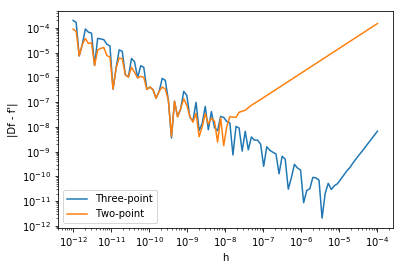

In [151]:

import numpy as np
import matplotlib.pyplot as plt

def One_sided(f, x, h):
    Df = (f(x+h) - f(x)) / h
    return Df

h_range = np.logspace(-12, -4, 100)  #уже приблизил к примерным оптимальным h

err_three = [np.abs(deriv(f, 1, h) - fder(1)) for h in h_range]
err_two = [np.abs(One_sided(f, 1, h) - fder(1)) for h in h_range]

plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('|Df - f\'|')

plt.plot(h_range, err_three, label='Three-point')
plt.plot(h_range, err_two, label='Two-point')
plt.legend()
plt.show()

Для two-point, h около 1e-8

Для three-point, h около 5e-6 - и при этом точность лучше на 2-3 порядка

### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [156]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-160]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000000 -- -1.386e-160


Выпишем нашу формулу для трехточечной схемы, учитывая, что х = 0, и f(x) = 0:

$ Df = \frac{2 f(h) - 0.5 f(2h)}{h} = \frac{2 h^2 ln(h) - 0.5 (2h)^2 ln(2h)}{h}  $

Учитывая, что $ ln(2h) = ln(2) + ln(h) $:

$ Df = \frac{-2h^2 ln(2)}{h} = -2ln(2) * h$   ---получается, что производная линейно зависит от h для нашей функции, поэтому у нас получается такой результат

Эта $-2ln(2)$ как раз и равна $1.386$

Если начать оценивать оптимальную h и минимальную ошибку, то получится, что оптимальное h -> 0, и эпсилон тоже, вот такой же график ошибки, как для предыдущего пункта:

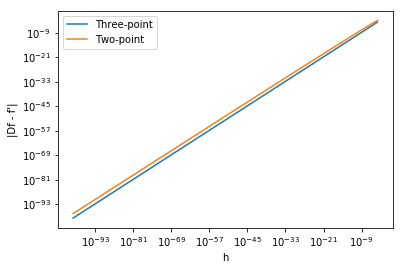

In [157]:
h_range = np.logspace(-100, -4, 10000)  #уже приблизил к примерным оптимальным h

err_three = [np.abs(deriv(f, 0, h) - fder(0)) for h in h_range]
err_two = [np.abs(One_sided(f, 0, h) - fder(0)) for h in h_range]

plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('|Df - f\'|')

plt.plot(h_range, err_three, label='Three-point')
plt.plot(h_range, err_two, label='Two-point')
plt.legend()
plt.show()

# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [126]:
def midpoint_rule(func, a, b, eps):
    """ Calculate the integral of f from a to b using the midpoint rule.
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    eps : float
        The target accuracy of the estimate.
        
    Returns
    -------
    integral : float
        The estimate of $\int_a^b f(x) dx$.
    intervals : int
        Number of intervals in finite sum
    """
    # ... ENTER YOUR CODE HERE ...
    N = 100
    step_n = (b - a) / N
    step_2n = (b - a) / (2*N)
    I_n = 0
    I_2n = 0
    for i in range(N):
        I_n += func(a + step_n/2 + step_n * i) * step_n       #два первых шага сетки
    for i in range(2 * N):
        I_2n += func(a + step_2n/2 + step_2n * i) * step_2n
        
    
    while np.abs(I_2n - I_n) > eps:   # в случае невыполнения условия, I_2n становится I_n, для I_2n увеличиваю число узлов в два раза
        I_n = I_2n
        step_2n /= 2
        I_2n = 0
        N *= 2
        
        for i in range(2 * N):
            I_2n += func(a + step_2n/2 + step_2n * i) * step_2n
        
    return I_n, N   # возвращаю сразу и кол-во интервалов
    

### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


Коэффициент пропорциональности error от N**-2  =  0.08332852205805708


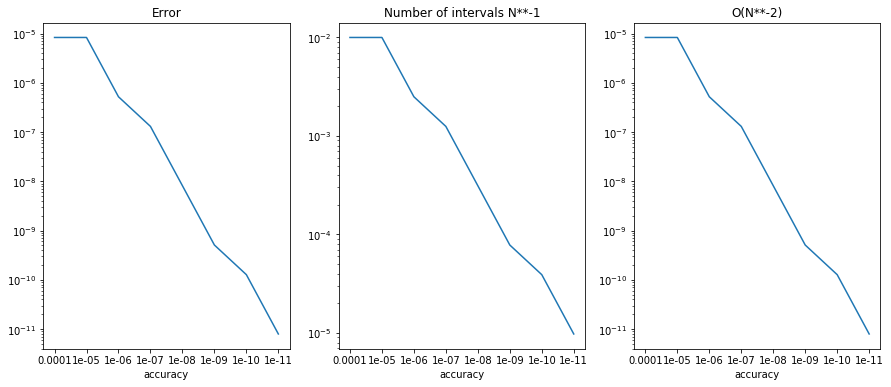

In [127]:
#... ENTER YOUR CODE AND COMMENTS HERE ...

def f1(x):
    return x**2

Truth = (2**3 - 1)/3  # истинное значение для итнеграла от x**2 от 1 до 2

Con = []
Num = []
Eps = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11]
for eps in Eps:
    I, n = midpoint_rule(f1, 1, 2, eps)
    Con.append(np.abs(I-Truth))             # смотрю на разные точности, считаю ошибку от истинного значения Truth
    Num.append(n**-1)

fig, ax = plt.subplots(ncols=3, figsize=(15,6))

ax[0].set(yscale='log', title='Error', xlabel='accuracy')
ax[1].set(yscale='log', title='Number of intervals N**-1', xlabel='accuracy')
ax[0].set_xticklabels([0] + Eps)
ax[1].set_xticklabels([0] + Eps)  # почему-то он отказывается видеть первый элемент массива для замены тиков на оси, поэтому добавляю dummy 0

ax[0].plot(range(8), Con)
ax[1].plot(range(8), Num)


#можно увидеть, что O(n**-2) ~ 0.0.8 * N**-2:
const = np.mean([Con[i] / Num[i]**2 for i in range(len(Num))])
print('Коэффициент пропорциональности error от N**-2  = ', const)

ax[2].set(yscale='log', title='O(N**-2)', xlabel='accuracy')
ax[2].set_xticklabels([0] + Eps)

Scaled = [const * x**2 for x in Num]
ax[2].plot(range(8), Scaled)

plt.show()

Можем увидеть, что сходится примерно как $ N^{-2} $

### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

In [120]:
# ... ENTER YOUR CODE HERE ...

acc = 1e-4
#straightforward:
def garbo(x):
    return np.sin(x**0.5)/x
Integral, a_lot = midpoint_rule(garbo, 0, 1, acc)
print(Integral, a_lot)

#avoiding singularity:
def non_singular(x):
    if np.abs(x) <= 1e-8:
        return 0
    else:
        return np.sin(x**0.5)/x - 1/x**0.5

Easy_part = 2 # интеграл от 1/x**0.5
Non_singular, N = midpoint_rule(non_singular, 0, 1, acc)
I = Easy_part + Non_singular
print(I, N)

1.8918319782852722 3276800
1.8921562911949747 100


Судя по кол-ву узлов сетки, стоит задумываться о сингулярностях в интегралах и устранять их ручками перед вычислением